# import neccesary packages

In [1]:
import pickle
from statistics import mean
import matplotlib.pyplot as plt
import os

In [2]:
file_names = ['result_POP.pickle','result_MPC.pickle','result_LCE.pickle','result_LCD.pickle']

In [3]:
os.chdir('..')

In [4]:
os.getcwd()

'/Users/sijiazhang/jupyter_notebook'

# 😯 Load variables

In [3]:
result = {}
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('hops'):
    os.mkdir('hops')
os.chdir('hops')
for file_name in file_names:
    f = open(file_name, 'rb')
    result[file_name] = pickle.load(f)
    f.close()

os.chdir('..')
os.chdir('..')

# Let's see the result of 

In [4]:
result

{'result_POP.pickle': {5: [11014,
   10664,
   10873,
   9493,
   9834,
   10061,
   11024,
   11500,
   11271,
   10284],
  10: [9969, 9659, 9919, 8853, 8727, 8486, 8575, 8544, 8344, 8572],
  16: [9076, 9185, 8945, 8157, 7964, 7998, 7668, 7667, 7679, 7829],
  20: [8940, 8764, 8671, 7855, 7735, 7600, 7679, 7469, 7327, 7342],
  26: [8366, 8163, 7949, 7467, 7250, 7242, 7253, 7236, 7220, 6957],
  30: [8115, 7700, 7737, 7168, 6977, 6973, 6944, 6942, 6874, 6956],
  35: [7741, 7098, 7231, 6868, 6950, 6753, 6550, 6640, 6564, 6696]},
 'result_MPC.pickle': {5: [11674,
   11448,
   11152,
   10389,
   10526,
   10155,
   10313,
   10691,
   10469,
   10475],
  10: [10939, 9870, 9760, 9828, 9774, 9507, 9679, 9679, 9587, 9506],
  15: [10684, 9959, 9179, 9115, 9135, 8897, 8952, 8965, 9041, 9081],
  20: [10754, 9560, 9355, 9050, 8796, 8594, 8878, 8660, 8719, 8640],
  25: [10247, 9271, 9075, 8844, 8438, 8258, 8597, 8427, 8406, 8423],
  30: [10412, 9565, 8997, 8662, 8491, 8466, 8166, 8147, 8345, 8000]

#  😯 Save variables

In [10]:
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('hops'):
    os.mkdir('hops')
os.chdir('hops')

f = open(file_name, 'wb')
pickle.dump(result['AS_hops'],f)
f.close()

os.chdir('../')
os.chdir('../')

# 😋 visualize

In [5]:
plt.plot(list(result['original'].keys()),list(float(mean(result['original'][k][4:8])/2000) for k in result['original'].keys()),'b--^')
plt.plot(list(result['AS_hops'].keys()),list(float(mean(result['AS_hops'][k][4:8])/2000) for k in result['AS_hops'].keys()),'g-o')
plt.legend(['Original','POP hops'])
plt.axis([0,40,0,6])
plt.xlabel('Total caching capability(%)')
plt.ylabel('Average hop Count')
plt.grid()

KeyError: 'original'

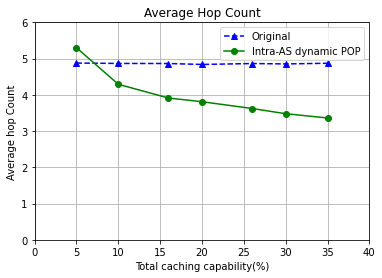

In [6]:
plt.plot(list(result['original'].keys()),list(float(mean(result['original'][k][4:8])/2000) for k in result['original'].keys()),'b--^')
plt.plot(list(result['AS_hops'].keys()),list(float(mean(result['AS_hops'][k][4:8])/2000) for k in result['AS_hops'].keys()),'g-o')
plt.legend(['Original','Intra-AS dynamic POP'])
plt.axis([0,40,0,6])
plt.title('Average Hop Count')
plt.xlabel('Total caching capability(%)')
plt.ylabel('Average hop Count')
plt.grid()
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('caching_capability_VS_Average_hops.png')
os.chdir('../')

## Others

In [57]:
result['result_LCD.pickle'] = {}
result['result_LCD.pickle'][5] = temp[5]
result['result_LCD.pickle'][10] = temp[10]
result['result_LCD.pickle'][15] = temp[15]
result['result_LCD.pickle'][20] = temp[20]
result['result_LCD.pickle'][25] = temp[25]
result['result_LCD.pickle'][20] = temp[30]
result['result_LCD.pickle'][35] = temp[35]

## 3 Use seaborn with Data analysis

In [7]:
import pandas as pd
import seaborn as sns

### Load variables

In [129]:
result_file = 'result_hops.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
    raise ValueError('no file in result')
    exit()
os.chdir('result/')
f = open(result_file, 'rb')
df = pickle.load(f)
f.close()
os.chdir('..')

## Create Variable from result

In [131]:
df = pd.DataFrame(columns = ['method','Cache Capacity' ,'Overall Hop count'])
for method in result.keys():
    for r in result[method].keys():
        #print({'method':method, 'Cache Capacity':r, 'Average Internal Traffic(requests)': mean(result[method][r][4:8])})
        df = df.append({'method':method,'Cache Capacity':r ,'Overall Hop count':mean(result[method][r][8:10])},ignore_index=True)

In [138]:
df

,method,Cache Capacity,Overall Hop count,Average Hop Count
0,result_POP.pickle,5,10777.5,5.38875
1,result_POP.pickle,10,8458.0,4.22900
2,result_POP.pickle,16,7754.0,3.87700
3,result_POP.pickle,20,7334.5,3.66725
4,result_POP.pickle,26,7088.5,3.54425
5,result_POP.pickle,30,6915.0,3.45750
6,result_POP.pickle,35,6630.0,3.31500
7,result_MPC.pickle,5,10472.0,5.23600
8,result_MPC.pickle,10,9546.5,4.77325
9,result_MPC.pickle,15,9061.0,4.53050


In [134]:
df['Average Hop Count'] = df['Overall Hop count']/2000

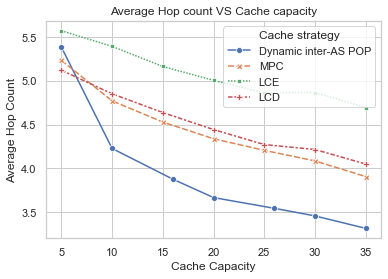

In [137]:
sns.lineplot(x = 'Cache Capacity', y = 'Average Hop Count', hue = 'method',style="method", markers = True, data = df)
plt.legend(title='Cache strategy', loc='upper right', labels=['Dynamic inter-AS POP', 'MPC', 'LCE', 'LCD'])
#plt.axis([0,40,0,6])
#plt.grid()
plt.title('Average Hop count VS Cache capacity')
#plt.axis([0,8,0,2000])

## 保存
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('caching_capability_VS_Average_hops.png')
os.chdir('../')

In [31]:
result_file = 'result_hops.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
f = open(result_file, 'wb')
pickle.dump(df,f)
f.close()
os.chdir('..')

## Hops Detail

### Load Variable

In [46]:
result_file = 'result_hops_detail.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
    raise ValueError('no file in result')
    exit()
os.chdir('result/')
f = open(result_file, 'rb')
df = pickle.load(f)
f.close()
os.chdir('..')

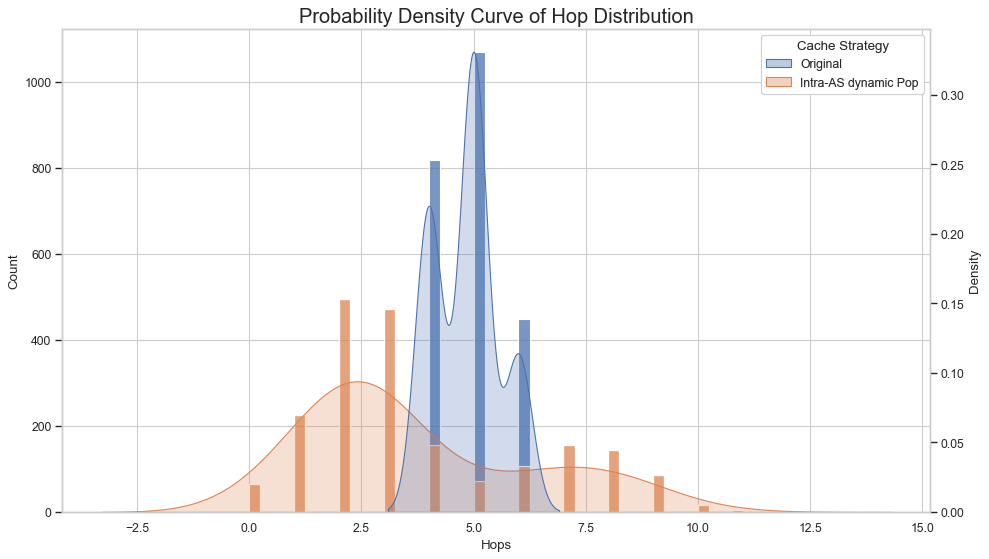

In [126]:
fig = plt.figure(figsize=(14, 8), dpi=80)
ax1 = fig.add_subplot()
sns.histplot(df, x="Hops", hue="Cache Strategy",kde = False, multiple="stack",element="step",linewidth = 1, ax = ax1)
ax2 = ax1.twinx()
sns.kdeplot(data = df,x = 'Hops', hue = 'Cache Strategy', bw_adjust=2.0,shade = True, ax = ax2)
#sns.set(style="whitegrid", font_scale=1)
plt.title('Probability Density Curve of Hop Distribution', fontsize=18)
plt.grid()
## 保存
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('Hop_distribution.png')
os.chdir('../')

In [ ]:
result_file = 'result_hops_detail.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
f = open(result_file, 'wb')
pickle.dump(df,f)
f.close()
os.chdir('..')